In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/02


In [2]:
files={}
files['MS3']=R.TFile("data/MS3.root")
files['OPT2_DRY']=R.TFile("data/OPT2/prodAnalysis_c40_OPT2_Jul2022.root")

In [3]:
g={}
# g['lyDT']=files['MS3'].Get("lyDTArray")
# g['tau']=files['MS3'].Get("tau_pmt")

In [4]:
#missing Prod5
arrays={}
arrays['MS3_DRY']={
    416:{'file':'data/tree_FirstRun005166_LastRun005193_ARRAY000416_THSCAN_SUMMARY.root','prod':1},
    586:{'file':'data/tree_FirstRun005226_LastRun005253_ARRAY000586_THSCAN_SUMMARY.root','prod':3},
    708:{'file':'data/tree_FirstRun005256_LastRun005283_ARRAY000708_THSCAN_SUMMARY.root','prod':4},
    531:{'file':'data/tree_FirstRun005196_LastRun005223_ARRAY000531_THSCAN_SUMMARY.root','prod':5},
    606:{'file':'data/tree_FirstRun005292_LastRun005319_ARRAY000606_THSCAN_SUMMARY.root','prod':9},
    481:{'file':'data/tree_FirstRun005070_LastRun005097_ARRAY000481_THSCAN_SUMMARY.root','prod':10}
}

arrays['OPT_DRY']={
    809:{'file':'data/tree_FirstRun005907_LastRun005934_ARRAY000809_THSCAN_SUMMARY.root','prod':1},
    805:{'file':'data/tree_FirstRun005817_LastRun005844_ARRAY000805_THSCAN_SUMMARY.root','prod':3},
    799:{'file':'data/tree_FirstRun005637_LastRun005664_ARRAY000799_THSCAN_SUMMARY.root','prod':4},
    801:{'file':'data/tree_FirstRun005697_LastRun005724_ARRAY000801_THSCAN_SUMMARY.root','prod':5},
#    800:{'file':'data/tree_FirstRun005667_LastRun005694_ARRAY000800_THSCAN_SUMMARY.root','prod':5},
    803:{'file':'data/tree_FirstRun005757_LastRun005784_ARRAY000803_THSCAN_SUMMARY.root','prod':9},
    796:{'file':'data/tree_FirstRun005040_LastRun005067_ARRAY000796_THSCAN_SUMMARY.root','prod':10}
}

map_prod={
    1:0,
    3:1,
    4:2,
    5:3,
    9:4,
    10:5
}

In [5]:
sigmaTvsTH=R.TF1("sigmaTvsTH","TMath::Sqrt([0]*[0]/TMath::Power(x,[1])+[2]*[2]*TMath::Power(x,[3]))",0,1000)
sigmaTvsTH.SetParameter(0,5.67032e+04)
sigmaTvsTH.SetParameter(2,6.21645e+01)
sigmaTvsTH.SetParLimits(1,0.,5)
sigmaTvsTH.SetParLimits(3,0,5)
sigmaTvsTH.SetParameter(1,3.1)
sigmaTvsTH.SetParameter(3,0.3)

In [6]:
for tag in ['MS3_DRY','OPT_DRY','OPT2_DRY']:
    for t in ['LY','sigmaT','XT','SR']:
        g['%s_%s'%(t,tag)]=R.TGraphErrors(len(map_prod))

for tag in ['MS3_DRY','OPT_DRY']:
    for ia,ar in enumerate(arrays[tag]):
        files[ar]=R.TFile(arrays[tag][ar]['file'])
        g['SR_%d'%ar]=files[ar].Get('DT_vs_bar')
        g['sigmaT_%d'%ar]=files[ar].Get('sigmaT_vs_bar')
        g['LY_%d'%ar]=files[ar].Get('LY_vs_bar')
        g['XT_%d'%ar]=files[ar].Get('XT_vs_bar')
        iv=map_prod[arrays[tag][ar]['prod']]
        pos=iv
        if ('OPT' in tag):
            pos+=0.1
        sigmaTvsTH.SetParameter(0,5.67032e+04)
        sigmaTvsTH.SetParameter(2,6.21645e+01)
        g['sigmaT_%d'%ar].Fit(sigmaTvsTH,"BR")
        sr=1./g['SR_%d'%ar].GetFunction('pol2').Derivative(150)*1000
        ly=R.TMath.Mean(g['LY_%d'%ar].GetN(),g['LY_%d'%ar].GetY())*2600/75.
        xt=R.TMath.Mean(g['XT_%d'%ar].GetN(),g['XT_%d'%ar].GetY())
        #sigmaT=sigmaTvsTH.GetMinimum()
        sigmaT=R.TMath.MinElement(g['sigmaT_%d'%ar].GetN(),g['sigmaT_%d'%ar].GetY())
        print(ar,sigmaT,ly,ly*75/2600.)
        g['SR_%s'%tag].SetPoint(iv,pos,sr)
        g['SR_%s'%tag].SetPointError(iv,0,sr*0.02)
        g['LY_%s'%tag].SetPoint(iv,pos,ly)
        g['LY_%s'%tag].SetPointError(iv,0,ly*0.03)
        g['sigmaT_%s'%tag].SetPoint(iv,pos,sigmaT)
        g['sigmaT_%s'%tag].SetPointError(iv,0,4.)
        g['XT_%s'%tag].SetPoint(iv,pos,xt)
        g['XT_%s'%tag].SetPointError(iv,0,0.01)

416 130.77797346170925 2620.858943799735 75.60170030191543
586 132.34572119194485 2532.1213829811204 73.04196297060925
708 138.02099843621147 2473.123223083949 71.34009297357545
531 125.61110587867933 2862.7417013010313 82.57908753752974
606 130.2758141396899 2667.23556295393 76.93948739290184
481 124.0820169000153 2736.916621199681 78.94951791922156
809 128.6561909778912 2586.2210430065907 74.60253008672858
805 131.24874140253408 2757.3256601905086 79.53824019780313
799 134.05100514352972 2488.6689030857056 71.7885260505492
801 121.66715924027287 2695.0267306062005 77.74115569056347
803 127.16445128059303 2697.9662164230003 77.82594855066347
796 119.29640277520008 2867.018319879154 82.7024515349756
 FCN=0.547109 FROM HESSE     STATUS=OK             23 CALLS        1168 TOTAL
                     EDM=1.16347e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      D

Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Abnormal termination of minimization.


In [15]:
for tag in ['OPT2_DRY']:
    opt2_ly_histos = files['OPT2_DRY']
    ly_gr = opt2_ly_histos.Get('ly_byProd_geo2_PREIRR')
    xt_gr = opt2_ly_histos.Get('xt_byProd_geo2_PREIRR')
    sigmaT_gr = opt2_ly_histos.Get('sigmaT_byProd_geo2_PREIRR')
#     c0=R.TCanvas('c0','c0',800,600)
#     c0.cd()
#     ly_gr.Draw()
#     c0.Draw()
    
    gr_map_prod ={1:0, 5:4, 10:8}
    for prod in [1,5,10]:
        iv=map_prod[prod]
        pos=iv+0.2
        
        ly=ly_gr.GetPointY(gr_map_prod[prod])*2600/75
        xt=xt_gr.GetPointY(gr_map_prod[prod]) 
        sigmaT=sigmaT_gr.GetPointY(gr_map_prod[prod]) 
        print(prod, ly, xt, sigmaT)
        g['LY_%s'%tag].SetPoint(iv,pos,ly)
        g['LY_%s'%tag].SetPointError(iv,0,ly*0.03)
        g['sigmaT_%s'%tag].SetPoint(iv,pos,sigmaT)
        g['sigmaT_%s'%tag].SetPointError(iv,0,4.)
        g['XT_%s'%tag].SetPoint(iv,pos,xt)
        g['XT_%s'%tag].SetPointError(iv,0,0.01)
     

1 2718.100334992136 0.14772512551904757 125.52457015614546
5 2586.8269925904915 0.07967715312976191 122.85373897651863
10 2981.459949527281 0.10598721088452383 133.01148058081446


In [16]:
c1=R.TCanvas('c1','c1',800,600)
l=R.TLegend(0.8,0.75,0.9,0.88)
l.SetFillColorAlpha(0,0)
l.SetBorderSize(0)
l.SetTextSize(0.04)

tL=R.TLatex()#pm                                                                                                                               
tL.SetTextSize(0.04)
R.gStyle.SetOptTitle(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [17]:
for k in ['MS3_DRY','OPT_DRY','OPT2_DRY']:
    for h in ['LY','SR','sigmaT','XT']:
        g['%s_%s'%(h,k)].GetHistogram().SetBins(6,-0.5,6-0.5)
        for kk,vendor in enumerate([1,3,4,5,9,10]):
            g['%s_%s'%(h,k)].GetHistogram().GetXaxis().SetBinLabel(kk+1,'prod%d'%vendor)

x[0]=0, y[0]=2620.86, ex[0]=0, ey[0]=78.6258
x[1]=1, y[1]=2532.12, ex[1]=0, ey[1]=75.9636
x[2]=2, y[2]=2473.12, ex[2]=0, ey[2]=74.1937
x[3]=3, y[3]=2862.74, ex[3]=0, ey[3]=85.8823
x[4]=4, y[4]=2667.24, ex[4]=0, ey[4]=80.0171
x[5]=5, y[5]=2736.92, ex[5]=0, ey[5]=82.1075


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LY_ARRAY_DRY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LY_ARRAY_DRY_byProd.pdf has been created


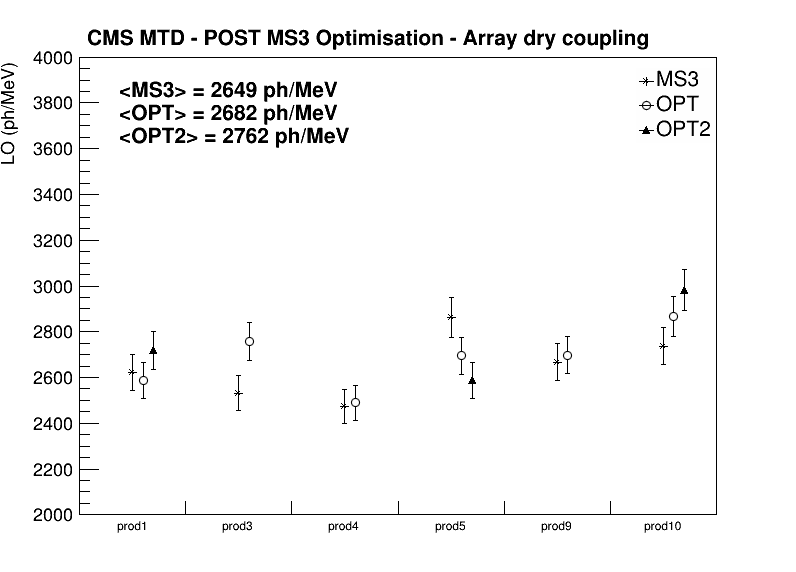

In [18]:
l.Clear()
g['LY_MS3_DRY'].Print()
g['LY_MS3_DRY'].Draw("AP*")
l.AddEntry(g['LY_MS3_DRY'],"MS3","PL")
g['LY_MS3_DRY'].GetHistogram().GetYaxis().SetLimits(2000,4000)
g['LY_MS3_DRY'].GetHistogram().GetYaxis().SetRangeUser(2000,4000)
g['LY_MS3_DRY'].GetHistogram().GetYaxis().SetTitle("LO (ph/MeV)")
g['LY_OPT_DRY'].SetMarkerStyle(24)
g['LY_OPT_DRY'].SetMarkerSize(1.2)
l.AddEntry(g['LY_OPT_DRY'],"OPT","PL")
g['LY_OPT_DRY'].Draw("PSAME")
g['LY_OPT2_DRY'].SetMarkerStyle(22)
g['LY_OPT2_DRY'].SetMarkerSize(1.2)
l.AddEntry(g['LY_OPT2_DRY'],"OPT2","PL")
g['LY_OPT2_DRY'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array dry coupling')
tL.DrawLatexNDC(0.15,0.83,'<MS3> = %.0f ph/MeV'%(R.TMath.Mean(6,g['LY_MS3_DRY'].GetY())))
tL.DrawLatexNDC(0.15,0.79,'<OPT> = %.0f ph/MeV'%(R.TMath.Mean(6,g['LY_OPT_DRY'].GetY())))
tL.DrawLatexNDC(0.15,0.75,'<OPT2> = %.0f ph/MeV'%(R.TMath.Mean(6,g['LY_OPT2_DRY'].GetY())*2))#multiply by 2 because half of elements are empty
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LY_ARRAY_DRY_byProd.%s'%ext)

x[0]=0, y[0]=130.778, ex[0]=0, ey[0]=4
x[1]=1, y[1]=132.346, ex[1]=0, ey[1]=4
x[2]=2, y[2]=138.021, ex[2]=0, ey[2]=4
x[3]=3, y[3]=125.611, ex[3]=0, ey[3]=4
x[4]=4, y[4]=130.276, ex[4]=0, ey[4]=4
x[5]=5, y[5]=124.082, ex[5]=0, ey[5]=4


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaT_ARRAY_DRY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaT_ARRAY_DRY_byProd.pdf has been created


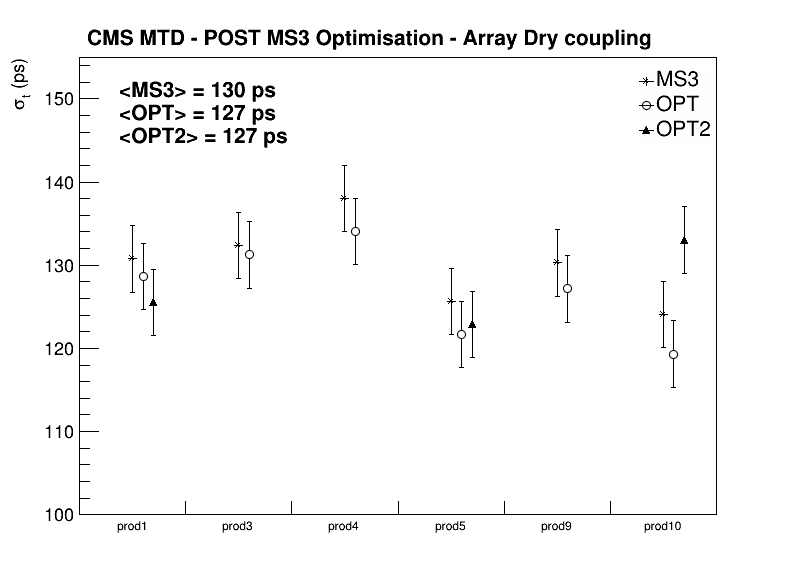

In [19]:
g['sigmaT_MS3_DRY'].Print()
g['sigmaT_MS3_DRY'].Draw("AP*")
g['sigmaT_MS3_DRY'].GetHistogram().GetYaxis().SetLimits(100,150)
g['sigmaT_MS3_DRY'].GetHistogram().GetYaxis().SetRangeUser(100,155)
g['sigmaT_MS3_DRY'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} (ps)")
g['sigmaT_OPT_DRY'].SetMarkerStyle(24)
g['sigmaT_OPT_DRY'].SetMarkerSize(1.2)
g['sigmaT_OPT_DRY'].Draw("PSAME")
g['sigmaT_OPT2_DRY'].SetMarkerStyle(22)
g['sigmaT_OPT2_DRY'].SetMarkerSize(1.2)
g['sigmaT_OPT2_DRY'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Dry coupling')
tL.DrawLatexNDC(0.15,0.83,'<MS3> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_MS3_DRY'].GetY())))
tL.DrawLatexNDC(0.15,0.79,'<OPT> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_OPT_DRY'].GetY())))
tL.DrawLatexNDC(0.15,0.75,'<OPT2> = %.0f ps'%(R.TMath.Mean(6,g['sigmaT_OPT2_DRY'].GetY())*2))#multiply by 2 because half of elements are empty
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaT_ARRAY_DRY_byProd.%s'%ext)

x[0]=0, y[0]=0.0138488, ex[0]=0, ey[0]=0.01
x[1]=1, y[1]=0.0455465, ex[1]=0, ey[1]=0.01
x[2]=2, y[2]=0.0709276, ex[2]=0, ey[2]=0.01
x[3]=3, y[3]=0.0865404, ex[3]=0, ey[3]=0.01
x[4]=4, y[4]=0.0218292, ex[4]=0, ey[4]=0.01
x[5]=5, y[5]=0.0186736, ex[5]=0, ey[5]=0.01


Info in <TCanvas::Print>: png file plots/LYSO_OPT_XT_ARRAY_DRY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_XT_ARRAY_DRY_byProd.pdf has been created


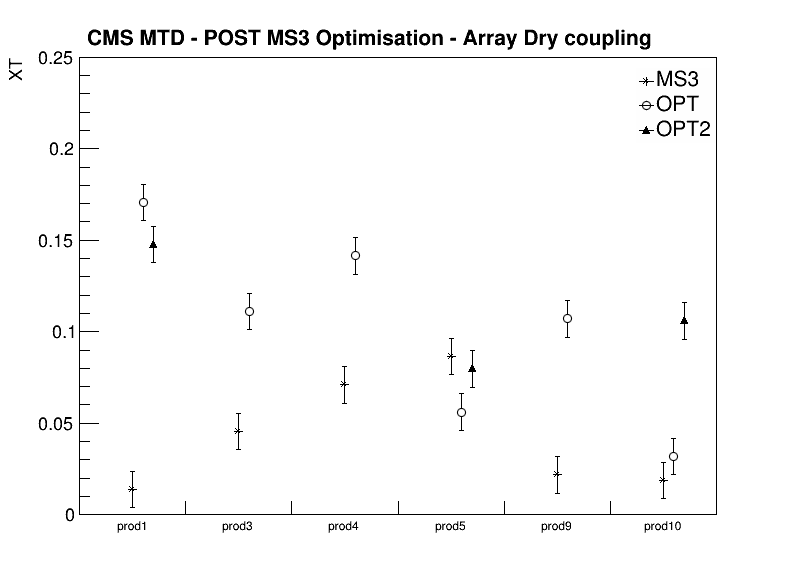

In [20]:
g['XT_MS3_DRY'].Print()
g['XT_MS3_DRY'].Draw("AP*")
g['XT_MS3_DRY'].GetHistogram().GetYaxis().SetLimits(0.000001,0.5)
g['XT_MS3_DRY'].GetHistogram().GetYaxis().SetRangeUser(0.000001,0.25)
g['XT_MS3_DRY'].GetHistogram().GetYaxis().SetTitle("XT")
g['XT_OPT_DRY'].SetMarkerStyle(24)
g['XT_OPT_DRY'].SetMarkerSize(1.2)
g['XT_OPT_DRY'].Draw("PSAME")
g['XT_OPT2_DRY'].SetMarkerStyle(22)
g['XT_OPT2_DRY'].SetMarkerSize(1.2)
g['XT_OPT2_DRY'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Dry coupling')

c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_XT_ARRAY_DRY_byProd.%s'%ext)

x[0]=0, y[0]=276.448, ex[0]=0, ey[0]=5.52896
x[1]=1, y[1]=277.934, ex[1]=0, ey[1]=5.55869
x[2]=2, y[2]=270.587, ex[2]=0, ey[2]=5.41174
x[3]=3, y[3]=279.149, ex[3]=0, ey[3]=5.58298
x[4]=4, y[4]=275.991, ex[4]=0, ey[4]=5.51983
x[5]=5, y[5]=283.418, ex[5]=0, ey[5]=5.66836


Info in <TCanvas::Print>: png file plots/LYSO_OPT_SR_ARRAY_DRY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_SR_ARRAY_DRY_byProd.pdf has been created


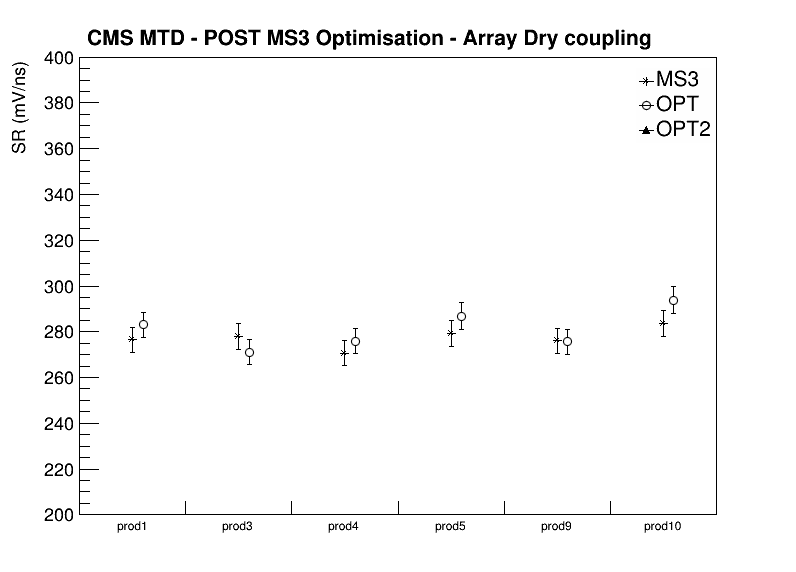

In [21]:
g['SR_MS3_DRY'].Print()
g['SR_MS3_DRY'].Draw("AP*")
g['SR_MS3_DRY'].GetHistogram().GetYaxis().SetLimits(200,400)
g['SR_MS3_DRY'].GetHistogram().GetYaxis().SetRangeUser(200,400)
g['SR_MS3_DRY'].GetHistogram().GetYaxis().SetTitle("SR (mV/ns)")
g['SR_OPT_DRY'].SetMarkerStyle(24)
g['SR_OPT_DRY'].SetMarkerSize(1.2)
g['SR_OPT_DRY'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Dry coupling')

c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_SR_ARRAY_DRY_byProd.%s'%ext)

In [22]:
fOut=R.TFile('LYSO_ARRAY_DRY_OPT_OPT2.root','RECREATE')
for hn,h in g.items():
    h.Write(hn)
fOut.Close()